In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
class VariableRateMortgage:
    def __init__(self, B_0, T, alpha):
        self.B_0 = B_0
        self.T = T
        self.alpha = alpha

    def alpha_integrated(self, t):
        """Numerically evaluate the function for the interest rate between 0 and given t using scipy.integrate.quad"""
        if t == 0: return 0 # Evaluating between 0 and 0 will give 0 anyway, so avoids dealing with functions that behave badly at 0
        return integrate.quad(self.alpha, 0, t)[0]

    def alpha_integrated_error(self, t):
        """For investigation of the numerical error of the numerical integration of interest rate"""
        if t == 0: return 0 # Evaluating between 0 and 0 will give 0 anyway, so avoids dealing with functions that behave badly at 0
        return integrate.quad(self.alpha, 0, t)[1]

    def r(self, t):
        return (self.B_0 / self.T) * np.exp(self.alpha_integrated(t))

    def B(self, t):
        return np.exp(self.alpha_integrated(t)) * (self.B_0 - integrate.quad(lambda s: self.B_0/self.T, 0, t)[0])

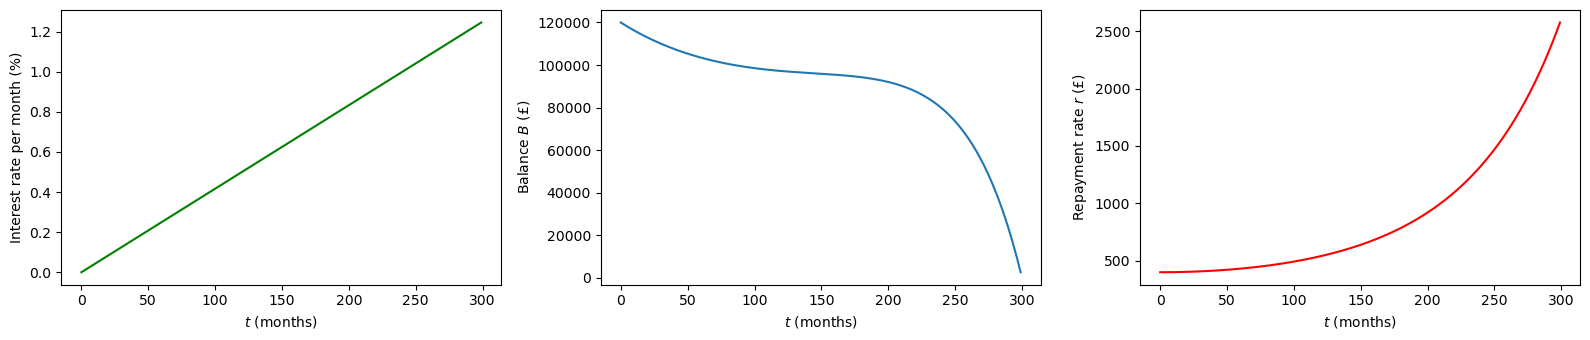

In [21]:
alpha = lambda t: 0.0005*t/12 # monthly interest rate
B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

first_variable_mortgage = VariableRateMortgage(B_0, T, alpha)

r_list = []
B_list = []
a_list = []
for t in range(T):
    r_list.append(first_variable_mortgage.r(t))
    B_list.append(first_variable_mortgage.B(t))
    a_list.append(alpha(t))


plt.figure(figsize=(16,3.5))
plt.subplot(131)
plt.plot(np.array(a_list)*100, 'g')
plt.ylabel("Interest rate per month (%)")
plt.xlabel("$t$ (months)")
plt.subplot(132)
plt.plot(B_list)
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B$ (£)")
plt.subplot(133)
plt.plot(np.array(r_list), 'r')
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r$ (£)")
plt.tight_layout()
plt.savefig("VariableInterestIncreasing.pdf")

C:\Users\ryane\AppData\Local\Temp\ipykernel_122504\3465449503.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(self.alpha, 0, t)[0]


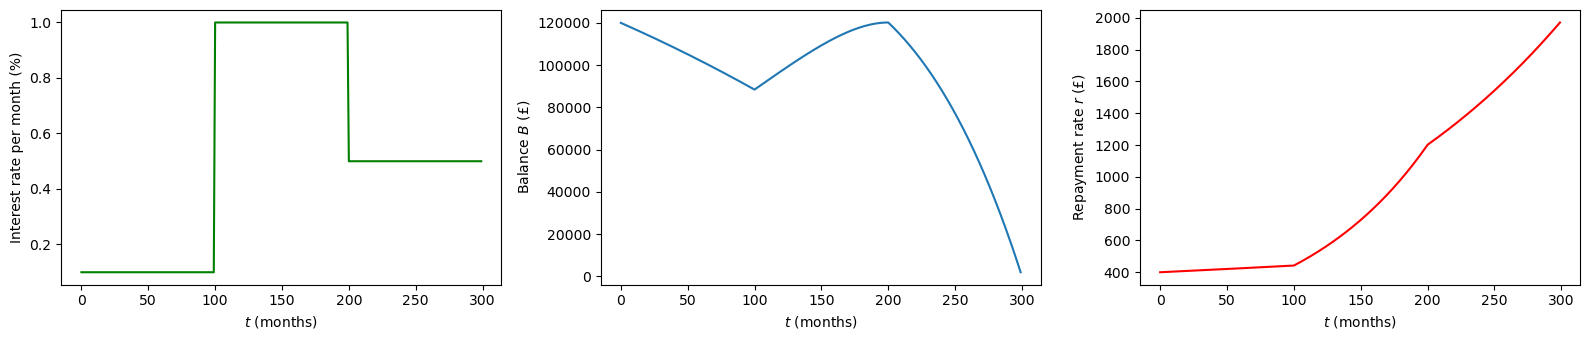

In [17]:
def alpha(t):
    if t < 100: return 0.001
    elif t < 200: return 0.01
    else: return 0.005
B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

m = VariableRateMortgage(B_0, T, alpha)

r_list = []
B_list = []
a_list = []
for t in range(T):
    r_list.append(m.r(t))
    B_list.append(m.B(t))
    a_list.append(alpha(t))


plt.figure(figsize=(16,3.5))
plt.subplot(131)
plt.plot(np.array(a_list)*100, 'g')
plt.ylabel("Interest rate per month (%)")
plt.xlabel("$t$ (months)")
plt.subplot(132)
plt.plot(B_list)
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B$ (£)")
plt.subplot(133)
plt.plot(np.array(r_list), 'r')
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r$ (£)")
plt.tight_layout()
plt.savefig("VariableInterestDiscrete.pdf")

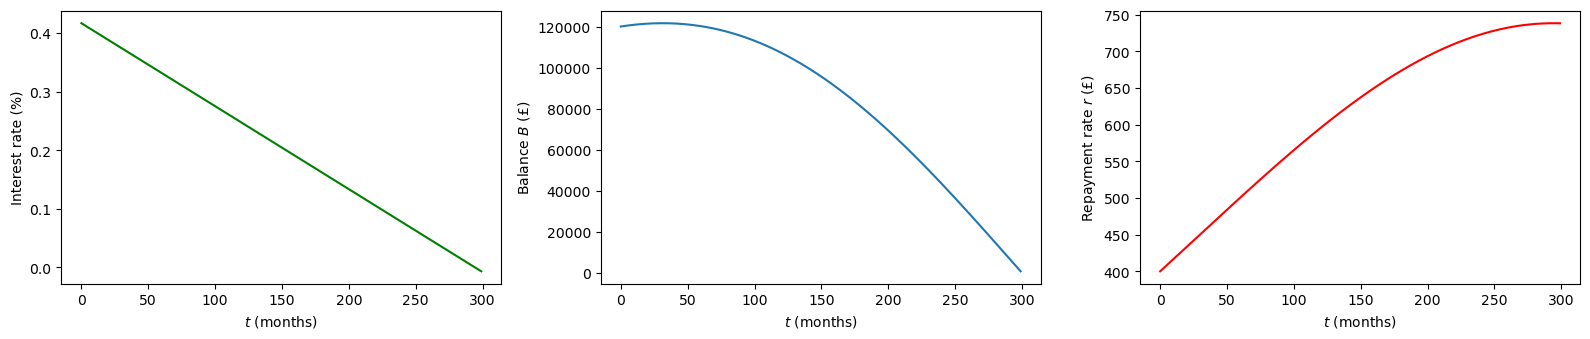

In [16]:
def alpha(t):
    return (0.05 - (0.051/T)*t)/12

B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

m = VariableRateMortgage(B_0, T, alpha)

r_list = []
B_list = []
a_list = []
for t in range(T):
    r_list.append(m.r(t))
    B_list.append(m.B(t))
    a_list.append(alpha(t))


plt.figure(figsize=(16,3.5))
plt.subplot(131)
plt.plot(np.array(a_list)*100, 'g')
plt.ylabel("Interest rate per month (%)")
plt.xlabel("$t$ (months)")
plt.subplot(132)
plt.plot(B_list)
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B$ (£)")
plt.subplot(133)
plt.plot(np.array(r_list), 'r')
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r$ (£)")
plt.tight_layout()
plt.savefig("VariableInterestDecreasing.pdf")

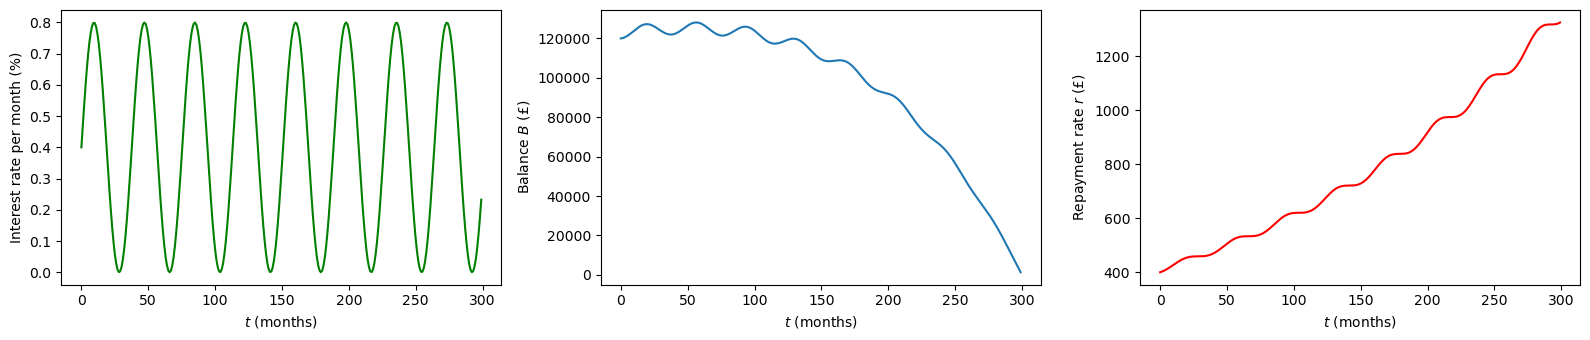

In [20]:
def alpha(t):
    return (1 + np.sin(t/6))/250

B_0 = 120000 # initial size of mortgage
T = 300 # length of mortgage in months

m = VariableRateMortgage(B_0, T, alpha)

r_list = []
B_list = []
a_list = []
for t in range(T):
    r_list.append(m.r(t))
    B_list.append(m.B(t))
    a_list.append(alpha(t))


plt.figure(figsize=(16,3.5))
plt.subplot(131)
plt.plot(np.array(a_list)*100, 'g')
plt.ylabel("Interest rate per month (%)")
plt.xlabel("$t$ (months)")
plt.subplot(132)
plt.plot(B_list)
plt.xlabel("$t$ (months)")
plt.ylabel("Balance $B$ (£)")
plt.subplot(133)
plt.plot(np.array(r_list), 'r')
plt.xlabel("$t$ (months)")
plt.ylabel("Repayment rate $r$ (£)")
plt.tight_layout()
plt.savefig("VariableInterestOscillating.pdf")